# **Machine Learning Tutorials - Classification**

This tutorial aims to practice machine learning classification models using XGBOOST and Random Forest on [diabetes dataset](https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset) from UCI Machine Learning Repository.

We want to compare the performance of both machine learning models using recall score. Recall measures how well a model identifies all the relevant instances in a dataset. For instance, we want to predict patients whether they potentially have early diabetes risks or not. The goal is to ensure diabetic patients are correctly identified so they receive timely treatment. High recall is crucial to minimize fewer diabetic patients are missed. Low recall means many diabetic patients go undiagnodsed, which can be life-threatening.

We will begin by importing libraries, loading and reviewing the dataset

## **Data Understanding**

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Other libraries
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing machine learning libraries

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline


In [3]:
# Loading & reading file
url = 'https://raw.githubusercontent.com/harishmuh/Early-Risk-Diabetes-predictor-Machine-Learning-and-app/refs/heads/main/diabetes_data.csv'
df = pd.read_csv(url)

In [4]:
# Quick review from top rows dataset
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
# Quick review from last rows dataset
df.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [6]:
# Column name
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [7]:
# Data dimension (rows, columns)
df.shape

(520, 17)

In [8]:
# Data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

## **Data Cleaning and Exploratory Data Analysis**

We will conduct quick exploratory data analysis (Data visualization and statistical descriptive) and data cleaning (handling missing values and duplicates)


In [10]:
# Statistical descriptive (numeric only)
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


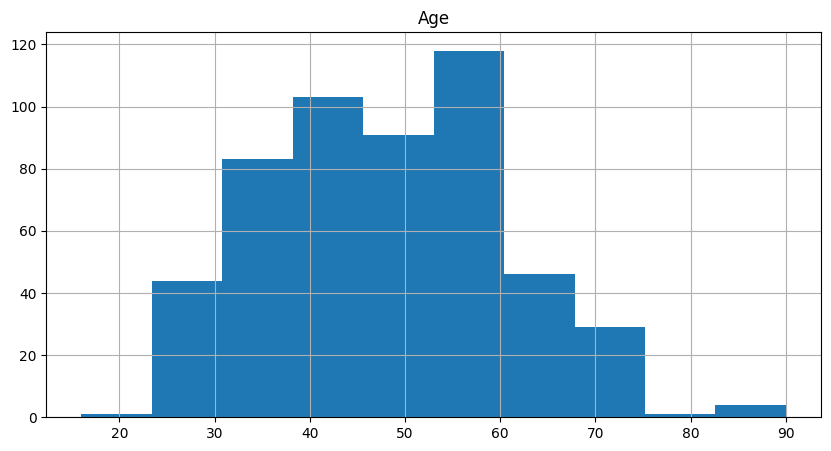

In [11]:
# Distribution of numerical variable
df.hist(bins=10, figsize=(10,5))
plt.show()

In [13]:
# Statistical descriptive include object
df.describe(include='O')

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320


In [14]:
# Check Missing values
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

No missing values in the dataframe

In [15]:
# duplicates check
df.duplicated().sum()

269

In [16]:
# drop them
df = df.drop_duplicates()

In [17]:
# Sanity Check
df.duplicated().sum()

0

In [19]:
# Separating column based on the data type type
numericals = df.select_dtypes(include='number').columns.tolist()
categoricals = df.select_dtypes(include='object').columns.tolist()

# Check
print('numericals columns:', numericals)
print('categoricals columns:', categoricals)

numericals columns: ['Age']
categoricals columns: ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']


## **Data Pre-processing**

We can proceed to build machine learning models after our dataset being cleaned and processed. 

In [20]:
# Importing machine learning libraries

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix, precision_score
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [21]:
# Make a copy of dataframe
data = df.copy()

In [22]:
# Review
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


**Feature Engineering**

In [23]:
# Define features and target

X = data.drop(columns ='class')
y = data['class']

In [24]:
# Changing format
y = y.replace({'Positive':1, 'Negative': 0})
y.unique()

array([1, 0], dtype=int64)

**Data Splitting**

This step aims to split data train and data test

In [25]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y) #  30% data test and 70% data train

**Data Encoding**

Encoding using OnehotEncoder to convert categorical data into numerical data type that can be processed by machine learning. We are using column transformer to encode all categorical columns. 

In [26]:
# Encoding
# Column Transformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']),
], remainder='passthrough')

## Model Development

### **XGBoost**

In [29]:
# Define model XGBoost
xgboost = XGBClassifier()

In [31]:
# Creating pipeline
classification_pipeline_xgb = Pipeline(
    [('transformer', transformer),
     ('algo', xgboost)
])

In [32]:
# Fitting model to XGBoost
classification_pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Polyuria',
                                                   'Polydipsia',
                                                   'sudden weight loss',
                                                   'weakness', 'Polyphagia',
                                                   'Genital thrush',
                                                   'visual blurring', 'Itching',
                                                   'Irritability',
                                                   'delayed healing',
                                                   'partial paresis',
                                                   'muscle stiffness',
                                                   'Alopecia', 'Obesity'])])),
                ('algo',
                 XGBC...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [33]:
# Testing data
y_pred = classification_pipeline_xgb.predict(X_test)

xgb_recall_score = recall_score(y_test, y_pred)

xgb_recall_score

0.9423076923076923

### **Random Forest**

In [38]:
# Define model XGBoost
rfc = RandomForestClassifier()

In [39]:
# Fitting the model
classification_pipeline_rfc = Pipeline(
    [('transformer', transformer),
     ('algo', rfc)
])

In [40]:
# Fitting model to random forest
classification_pipeline_rfc.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Polyuria',
                                                   'Polydipsia',
                                                   'sudden weight loss',
                                                   'weakness', 'Polyphagia',
                                                   'Genital thrush',
                                                   'visual blurring', 'Itching',
                                                   'Irritability',
                                                   'delayed healing',
                                                   'partial paresis',
                                                   'muscle stiffness',
                                                   'Alopecia', 'Obesity'])])),
                ('algo', RandomForestClassifier())])

In [41]:
# Testing data
y_pred = classification_pipeline_rfc.predict(X_test)

rfc_recall_score = recall_score(y_test, y_pred)

rfc_recall_score

0.9807692307692307

## **Conclusion**

We have compared the recall score of XGBoost and Random Forest. A higher recall score was obtained from Random forest (Recall = 0.98) than XGBoost (Recall = 0.94).
